<a href="https://colab.research.google.com/github/WaterForTansania/WFT/blob/master/WaterForTansania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import pandas as pd # pandas to read the dataset
import numpy as np 
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from numpy import nan #To find missing values
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import datetime

Read the target values dataset from the drivendata link.

In [297]:
url = 'https://s3.amazonaws.com/drivendata-prod/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'
df_labels = pd.read_csv(url)

Read the label values dataset from the drivendata link.

In [298]:
url = "https://s3.amazonaws.com/drivendata-prod/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv"
df_values = pd.read_csv(url)

Label dataset is in this form:

In [299]:
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Description for labels dataset.

In [300]:
df_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Target values in dataset is in the form of :

In [301]:
df_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


Plotting target values with percentages.

Text(0, 0.5, ' ')

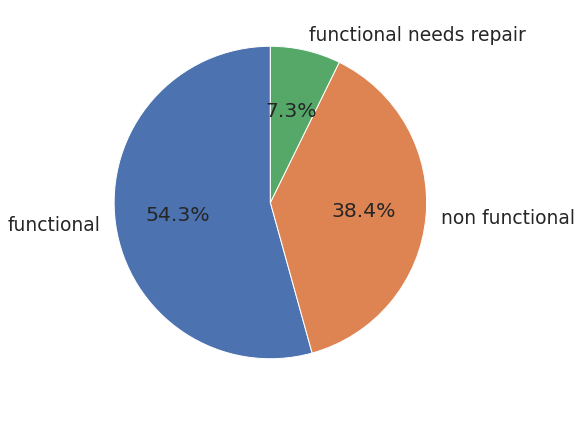

In [302]:
per_plot = df_labels['status_group'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=False, startangle=90 , figsize=(7,13))
per_plot.set_xlabel(" ")
per_plot.set_ylabel(" ")

Merged the label and target dataset to df_merged.

In [303]:
df_merged = df_labels.merge(df_values)
df_region = df_merged.fillna("unknown")
df_region = df_region.loc[:, ['region', 'status_group']]
df_region.head()

,region,status_group
0,Iringa,functional
1,Mara,functional
2,Manyara,functional
3,Mtwara,non functional
4,Kagera,functional


Used the merged dataset for plotting

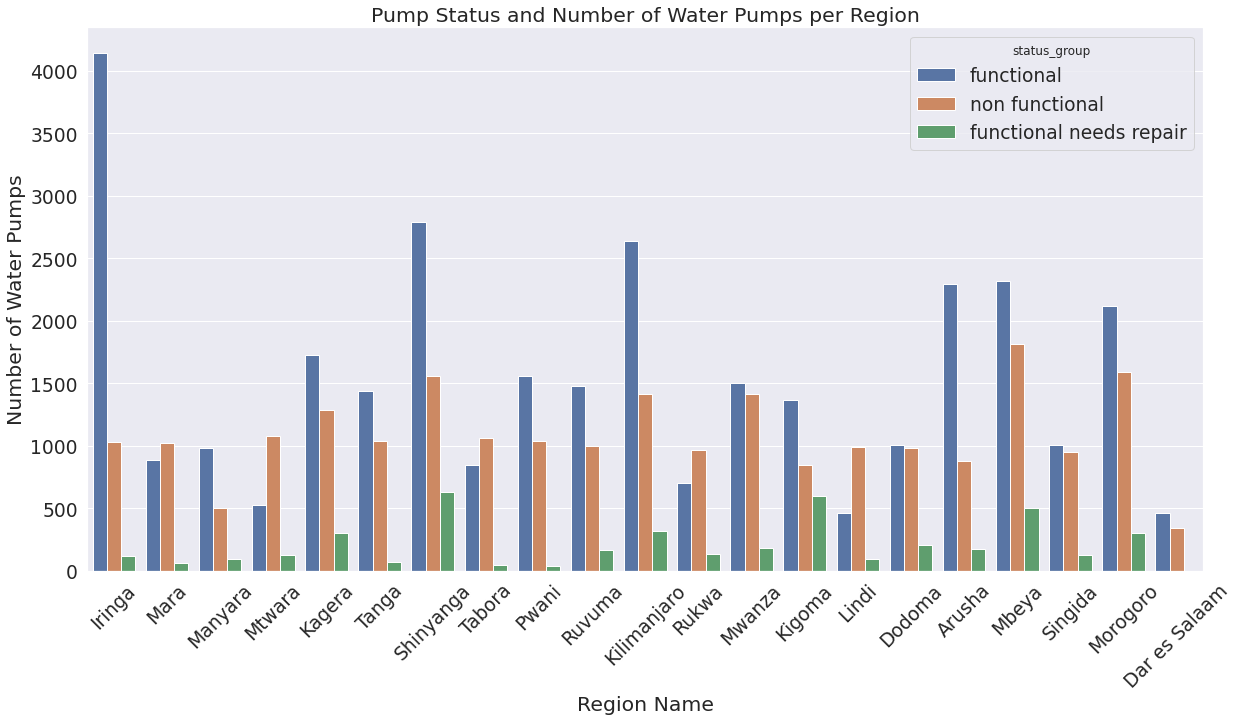

In [304]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax = sns.countplot(data=df_region, x='region', hue='status_group')

ax.set(xlabel='Region Name', ylabel='Number of Water Pumps', title='Pump Status and Number of Water Pumps per Region')

sns.set(font_scale=1.7)
plt.xticks(rotation=45);

In [305]:
df_filledvalues = df_values.fillna("unknown")

In [306]:
df_filledvalues.sort_values("funder")

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
29127,33298,0.0,2013-03-15,0,-50,0,39.412527,-6.865332,Zahanati,0,Wami / Ruvu,Zahanati,Dar es Salaam,7,3,Temeke,Somangira,100,True,GeoData Consultants Ltd,VWC,unknown,False,1970,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other
40228,32754,50.0,2013-03-19,0,68,0,39.123165,-6.886802,Kwa Mwangoge,0,Wami / Ruvu,Mtaa Wa Pugu Station,Dar es Salaam,7,2,Ilala,Pugu,250,unknown,GeoData Consultants Ltd,WUG,unknown,False,2010,submersible,submersible,submersible,wug,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
57744,3230,0.0,2013-03-18,0,-18,0,39.505205,-7.162921,Kwa Bakari Selemani,0,Wami / Ruvu,Pemba Mnazi Centre,Dar es Salaam,7,3,Temeke,Pemba Mnazi,50,True,GeoData Consultants Ltd,VWC,unknown,False,2000,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,other,other
55094,25724,0.0,2013-03-14,0,-12,0,39.488420,-6.916953,Kwa Pazi,0,Wami / Ruvu,Sara,Dar es Salaam,7,3,Temeke,Somangira,1,True,GeoData Consultants Ltd,SWC,unknown,False,2000,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other
34374,5900,100.0,2013-03-17,0,65,0,39.101551,-6.965764,Kwa Denis Agustino,0,Wami / Ruvu,Mtaa Wa Kigezi,Dar es Salaam,7,2,Ilala,Chanika,60,unknown,GeoData Consultants Ltd,Private operator,unknown,False,2010,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,hand dtw,borehole,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29907,25667,0.0,2013-03-18,unknown,1887,DWE,36.111895,-2.661133,Kwa Yahana,0,Internal,Ng'Ong'Oi,Arusha,2,6,Longido,Gelai Meirugoi,800,True,GeoData Consultants Ltd,VWC,unknown,unknown,1996,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
56543,43609,0.0,2013-03-12,unknown,1487,unknown,36.419235,-3.761356,Zahanati,0,Pangani,Lolkisale B,Arusha,2,1,Monduli,Lolkisale,1,False,GeoData Consultants Ltd,VWC,L,unknown,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
19587,15541,0.0,2013-03-06,unknown,1508,unknown,34.658791,-1.949444,Nyagoti Primary School,0,Lake Victoria,Park B,Mara,20,2,Serengeti,Natta,375,unknown,GeoData Consultants Ltd,Other,unknown,True,2009,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
29880,37275,0.0,2013-03-14,unknown,1069,unknown,35.955476,-3.220071,Sekondari 3,0,Internal,Bomba,Arusha,2,1,Monduli,Selela,1,False,GeoData Consultants Ltd,Parastatal,S,unknown,2000,gravity,gravity,gravity,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe


In [307]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [308]:
MultiColumnLabelEncoder(columns = ['funder',
                                   'installer',
                                   'wpt_name',
                                   'basin',
                                   'subvillage',
                                   'region',
                                   'lga',
                                   'ward',
                                   #'public_meeting',
                                   'recorded_by',
                                   'scheme_management',
                                   'scheme_name',
                                   #'permit',
                                   'extraction_type',
                                   'extraction_type_group',
                                   'extraction_type_class',
                                   'management',
                                   'management_group',
                                   'payment', 
                                   'payment_type',
                                   'water_quality',
                                   'quality_group',
                                   'quantity',
                                   'quantity_group',
                                   'source',
                                   'source_type',
                                   'source_class',
                                   'waterpoint_type',
                                   'waterpoint_type_group']).fit_transform(df_filledvalues)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,1369,1390,1518,34.938093,-9.856322,37399,0,1,11807,3,11,5,51,1426,109,True,0,7,2245,False,1999,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1
1,8776,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,37195,0,4,15838,9,20,2,103,1576,280,unknown,0,2,2680,True,2010,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1
2,34310,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,14572,0,5,9074,8,21,4,108,1624,250,True,0,7,2121,True,2009,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1
3,67743,0.0,2013-01-28,1741,263,1852,38.486161,-11.155298,37285,0,7,8982,12,90,63,87,1571,58,True,0,7,2680,True,1986,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1
4,19728,0.0,2011-07-13,20,0,119,31.130847,-1.825359,35529,0,4,7698,4,18,1,26,1687,0,True,0,12,2680,True,0,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,436,1210,201,37.169807,-3.253847,513,0,5,5681,6,3,5,16,1090,125,True,0,10,1068,True,1999,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1
59396,27263,4700.0,2011-05-07,177,1212,265,35.249991,-9.070629,24074,0,6,2980,3,11,4,91,353,56,True,0,7,479,True,1996,3,1,0,7,4,2,0,6,2,1,1,6,4,1,1,1
59397,37057,0.0,2011-04-11,1897,0,2131,34.017087,-8.750434,27926,0,6,8784,10,12,7,59,177,0,True,0,7,2680,False,0,15,11,1,7,4,3,1,1,1,1,1,3,0,0,4,3
59398,31282,0.0,2011-03-08,884,0,1213,35.861315,-6.378573,29693,0,6,14012,2,1,4,11,1449,0,True,0,7,2680,True,0,8,5,1,7,4,0,2,6,2,2,2,7,5,0,4,3


In [309]:
missing_values_count = df_values.isnull().sum()
missing_values_count

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [310]:
# how many total missing values do we have?
total_cells = np.product(df_values.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.939983164983165

In [311]:
# Value is missing because it wasn't recorded or because it doesn't exist?
# If value is missing, keep it Nan, if it wasn't recorded then you can try to guess, called as imputation! 

# Remove all the rows that contain a missing value
# df_values.dropna()

# remove all columns with at least one missing value
# columns_with_na_dropped = df_values.dropna(axis=1)
# columns_with_na_dropped.head()

# just how much data did we lose?
# print("Columns in original dataset: %d \n" % df_values.shape[1])
# print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

In [312]:
# none is not reserved word
# subset_data = df_values.loc[:, 'id':'waterpoint_type_group']
# subset_data.fillna(0)

In [313]:
# df_values['latitude'].fillna((df_values['latitude'].mean()), inplace=True)


In [314]:
del df_values['recorded_by']

To lower case all values in each row to make the changes easier.

In [315]:
for key in df_values.keys():
    df_values[key] = df_values[key].map(lambda x: x if type(x)!=str else x.lower())

Changed all rows with 0 value on construction_year to mean of non-zero rows.

In [316]:
df_values2 = df_values['construction_year'].copy()
df_values2 = df_values2[df_values2 != 0]
df_values['construction_year'] = df_values['construction_year'].replace(0, int(df_values2.mean()))

Added new column using construction year and year recorded to have a meaningful column. Dropped construction year,year recorded columns and the columns that are added inside of the method.

#Other columns can be added.

In [317]:
def date_parser(df):
    date_recorder = list(map(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d'),
                             df['date_recorded'].values))
    df['year_recorder'] = list(map(lambda x: int(x.strftime('%Y')), date_recorder))
    df['weekday_recorder'] = list(map(lambda x: int(x.strftime('%w')), date_recorder))
    df['yearly_week_recorder'] = list(map(lambda x: int(x.strftime('%W')), date_recorder))
    df['month_recorder'] = list(map(lambda x: int(x.strftime('%m')), date_recorder))
    df['age'] = df['year_recorder'].values - df['construction_year'].values
    del df['date_recorded']
    del df['weekday_recorder']
    del df['yearly_week_recorder']
    del df['construction_year']
    del df['month_recorder']
    del df['year_recorder']
    return df

In [318]:
df_values = date_parser(df_values)

In [319]:
df_values

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age
0,69572,6000.0,roman,1390,roman,34.938093,-9.856322,none,0,lake nyasa,mnyusi b,iringa,11,5,ludewa,mundindi,109,True,vwc,roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12
1,8776,0.0,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,lake victoria,nyamara,mara,20,2,serengeti,natta,280,NaN,other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3
2,34310,25.0,lottery club,686,world vision,37.460664,-3.821329,kwa mahundi,0,pangani,majengo,manyara,21,4,simanjiro,ngorika,250,True,vwc,nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4
3,67743,0.0,unicef,263,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,ruvuma / southern coast,mahakamani,mtwara,90,63,nanyumbu,nanyumbu,58,True,vwc,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27
4,19728,0.0,action in a,0,artisan,31.130847,-1.825359,shuleni,0,lake victoria,kyanyamisa,kagera,18,1,karagwe,nyakasimbi,0,True,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,germany republi,1210,ces,37.169807,-3.253847,area three namba 27,0,pangani,kiduruni,kilimanjaro,3,5,hai,masama magharibi,125,True,water board,losaa kia water supply,True,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,14
59396,27263,4700.0,cefa-njombe,1212,cefa,35.249991,-9.070629,kwa yahona kuvala,0,rufiji,igumbilo,iringa,11,4,njombe,ikondo,56,True,vwc,ikondo electrical water sch,True,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,15
59397,37057,0.0,NaN,0,NaN,34.017087,-8.750434,mashine,0,rufiji,madungulu,mbeya,12,7,mbarali,chimala,0,True,vwc,NaN,False,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,15
59398,31282,0.0,malec,0,musa,35.861315,-6.378573,mshoro,0,rufiji,mwinyi,dodoma,1,4,chamwino,mvumi makulu,0,True,vwc,NaN,True,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,15
